In [1]:
# Import libearies
import tensorflow as tf # !pip install tensorflow
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [3]:
# Zero dimensional tensor
zero_dim_array = 20
zero_dim_tensor = tf.constant(zero_dim_array)
print("0-dimensional array:", zero_dim_tensor)

# One dimensional tensor
one_dim_array = np.array([12, 20, 53, 26, 11, 56], dtype = 'int32')
one_dim_tensor = tf.constant(one_dim_array)
print("1-dimensional array:", one_dim_tensor)

# Two dimensional tensor
two_dim_array = np.array([[3, 6, 7, 5], 
                          [9, 2, 3, 4],
                          [7, 1, 10,6],
                          [0, 8, 11,2]], dtype = 'int32')
two_dim_tensor = tf.constant(two_dim_array)
print("2-dimensional array:", two_dim_tensor)

0-dimensional array: tf.Tensor(20, shape=(), dtype=int32)
1-dimensional array: tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
2-dimensional array: tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


# Convolutional Neural Network (CNN or ConvNet) 
- Convolutional layers
- Rectified Linear Unit (ReLU for short)
- Pooling layers
- Fully connected layers

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Load dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# assert x_train.shape == (50000, 32, 32, 3)
# assert x_test.shape == (10000, 32, 32, 3)
# assert y_train.shape == (50000, 1)
# assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


## Exploratory Data Analysis

In [9]:
def show_images(train_images,
            	class_names,
            	train_labels,
            	nb_samples = 12, nb_row = 4):
    
	plt.figure(figsize = (12, 12))
	for i in range(nb_samples):
		plt.subplot(nb_row, nb_row, i + 1)
		plt.xticks([])
		plt.yticks([])
		plt.grid(False)
		plt.imshow(train_images[i], cmap = plt.cm.binary)
		plt.xlabel(class_names[train_labels[i][0]])
	plt.show()

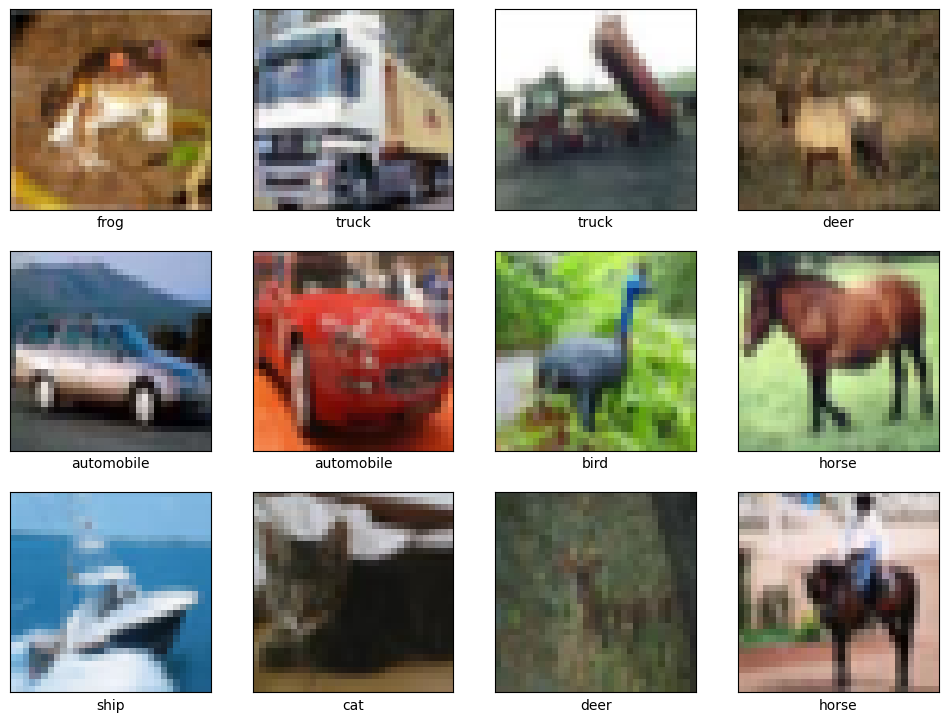

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

## Data preprocessing

In [12]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [14]:
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

## Model architecture implementation

In [15]:
# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

In [6]:
# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]